<a href="https://colab.research.google.com/github/2303A51817/ADM/blob/main/Lab__6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
data

array([ 0.07942844,  2.19020236, -0.13489215,  0.16051798,  0.44269784,
        0.62339144,  1.00890349,  0.39424879, -0.3363867 , -0.64590646,
        0.80545771,  0.41644284,  0.57461975, -1.10167133, -0.99475687,
        1.34551948,  0.58186781,  0.53723871,  2.06704686, -0.29032412,
        0.60136507, -0.56452682, -1.16795166, -1.02200224,  0.88351955,
       -0.53374449, -1.35043218,  0.23009402,  0.89485483,  1.37075992,
        2.4637016 ,  1.12790137, -0.81921415,  0.06746414,  1.07721625,
       -0.55354496,  0.67761732,  1.04149369, -1.75142185,  0.11866949,
        1.13870114,  0.67708514,  0.30613517, -0.01527223,  2.06798861,
       -0.04526817, -1.60312492, -0.46775177,  0.14865763,  0.35287085,
       -0.25065087,  0.08612803, -0.17016487,  0.85066808, -1.11876667,
       -0.07386418, -1.41319886, -1.11989389,  0.37246012, -0.44307419,
        0.97007537,  0.05719957,  0.53446472,  1.21647473, -0.55592819,
       -2.29114714, -1.50512601, -1.24273965, -0.4613874 , -1.23

In [4]:
# Create a synthetic dataset
np.random.seed(18)
data=np.random.normal(0,1,100)#Normal Distribution
outliers = np.random.uniform(5,10,5) #Aritficial Outlines

In [8]:
data.min()

-2.291147139324946

In [9]:
data.max()

3.030216355567278

In [5]:
data_with_outliers = np.concatenate((data,outliers))

In [6]:
# Convert to DataFrame
df = pd.DataFrame(data_with_outliers, columns=['Value'])

In [11]:
#Step 1: Detect Outliners using IQR method
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)
IQR=Q3-Q1
lowerbound=Q1-1.5*IQR
upperbound=Q3+1.5*IQR
print(lowerbound)
print(upperbound)

-2.867433281341298
3.3347055465717674


In [12]:
# Identifying Outliners based on IQR
outliers_iqr = df[(df['Value'] < lowerbound) | (df['Value'] > upperbound)]

In [14]:
# step 2: Detect Outliners using Z-Score method
z_scores = stats.zscore(df['Value'])
Outliners_zscore=df[np.abs(z_scores)>3]

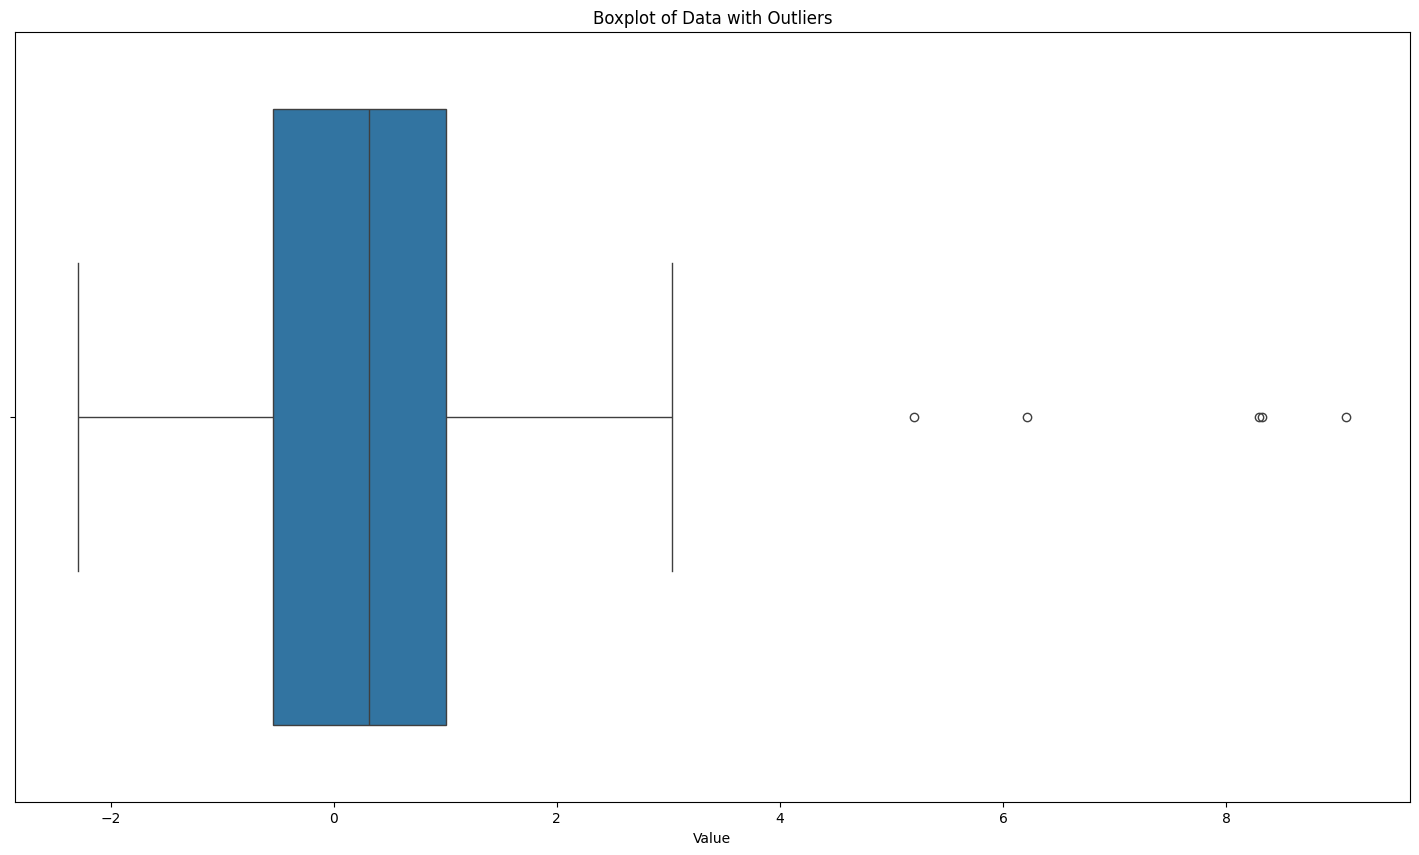

In [15]:
# step 3: Visualise outliners using a boxplot
plt.figure(figsize=(18,10))
sns.boxplot(x=df['Value'])
plt.title('Boxplot of Data with Outliers')
plt.show()

In [17]:
# step 4: Handle ouliners
#Capping :set outliners to the upper and lower bounds
df_capped = df.copy()
df_capped['Value']=np.clip(df_capped['Value'],lowerbound,upperbound)


In [19]:
# Removal : Drop rows with Outliners
df_removed=df.copy()
df_removed=df_removed[(df_removed['Value']>=lowerbound)&
(df_removed['Value']<=upperbound)]

In [20]:
# Imputation  : Replace outliners with median
df_imputed=df.copy()
median_value=df_imputed['Value'].median()
df_imputed.loc[df_imputed['Value']>upperbound,'Value']=median_value
df_imputed.loc[df_imputed['Value']<lowerbound,'Value']=median_value

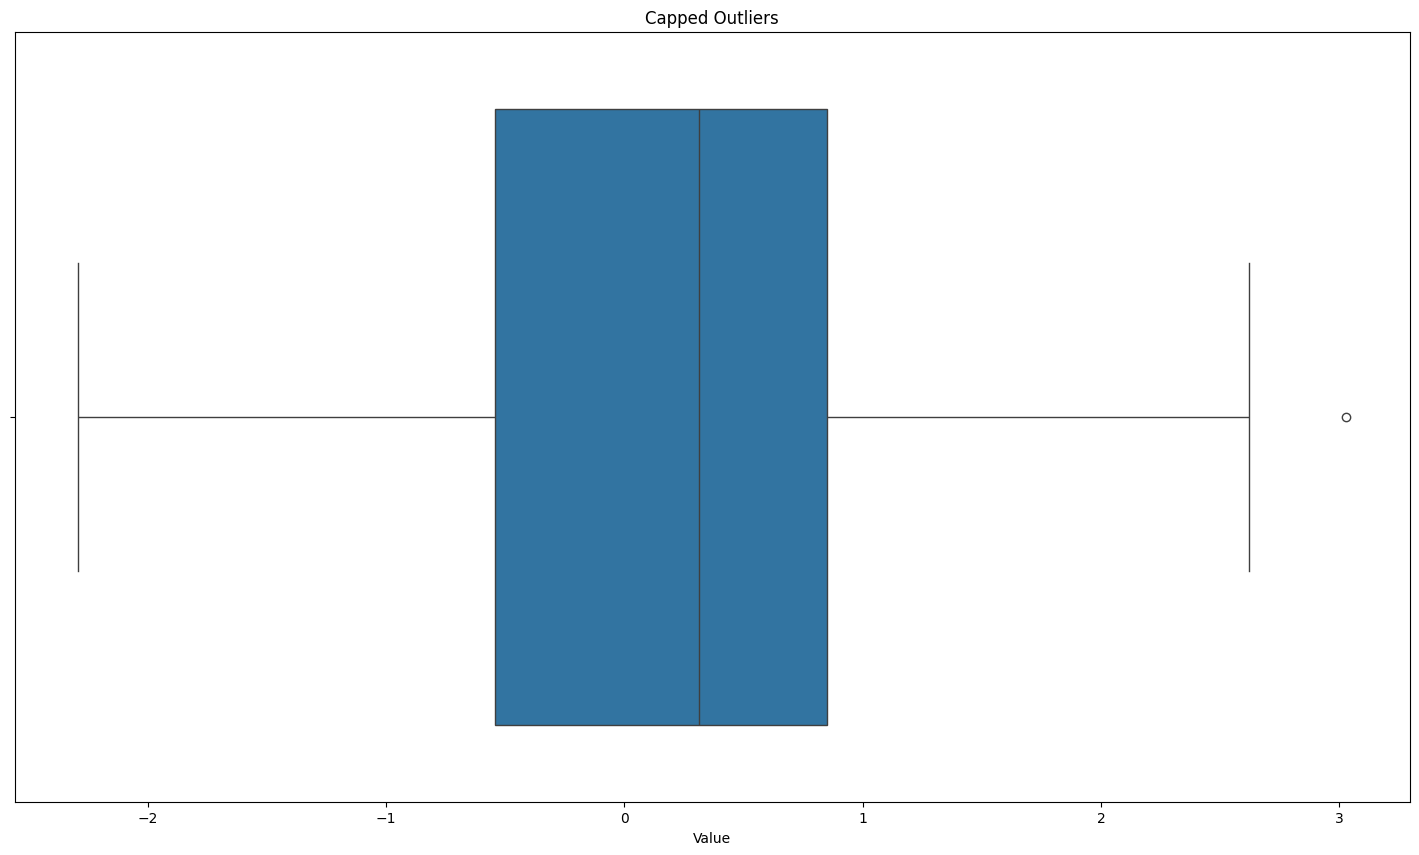

In [21]:
# step 5 : Visualise handled data
plt.figure(figsize=(18,10))
sns.boxplot(x=df_imputed['Value'])
plt.title('Capped Outliers')
plt.show()